# ObsPy play

Playing around with ObsPy, especially SEGY read and write. [More here.](http://docs.obspy.org/packages/obspy.segy.html)

In [1]:
import obspy

## Reading data

In [2]:
filename = "data/31_81_PR.sgy"
section = obspy.read(filename)

In ObsPy, a `Stream` is a sequence of `Trace` objects.

In [3]:
type(section), type(section[0])

(obspy.core.stream.Stream, obspy.core.trace.Trace)

In [4]:
print(section)

534 Trace(s) in Stream:

Seq. No. in line:    1 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:06.000000Z | 250.0 Hz, 1501 samples
...
(532 other traces)
...
Seq. No. in line:  534 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:06.000000Z | 250.0 Hz, 1501 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


Traces know how to plot themselves, but streams don't:

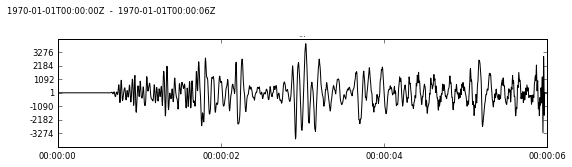

In [5]:
%matplotlib inline
section[3].plot()

In [6]:
section[3].data

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [7]:
import numpy
data = numpy.vstack([d for d in section])

In [8]:
data

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

Can plot this as a section; have to transpose though, since 'rows' are actually traces:

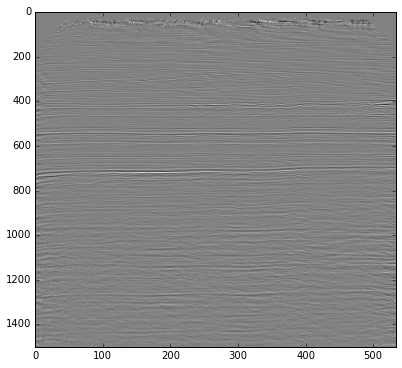

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.imshow(data.T, cmap="gray", aspect=0.33)

This now represents what we would make as a synthetic seismic section, say.

## Reading trace headers

Streams carry file-wide headers, which we'll get to. Here are the trace headers.

In [10]:
t = section[3]
print(t)

Seq. No. in line:    4 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:06.000000Z | 250.0 Hz, 1501 samples


In [11]:
t.stats.segy.trace_header.trace_sequence_number_within_line

4

In [12]:
t.stats.segy.trace_header

LazyTraceHeaderAttribDict({'unpacked_header': "\x00\x00\x00\x04\x00\x00\x00\x04\x00\x00\x00o\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00h\x00\x00\x00\x01\x00\x01\x00\x01\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\xdd\x0f\xa0\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\n\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x17p\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00#\x00\x00'\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00", 'sample

In [13]:
t.stats.segy.trace_header.number_of_samples_in_this_trace

1501

In [14]:
t.stats.segy.trace_header.sample_interval_in_ms_for_this_trace

4000

In [15]:
t.stats.segy.trace_header.datum_elevation_at_receiver_group

0

In [16]:
import codecs
header = t.stats.segy.trace_header.unpacked_header
codecs.decode(header, "cp500").encode('utf-8')  # cp500 is EBCDIC; no idea how to read this nonsense

'\x00\x00\x00\xc2\x9c\x00\x00\x00\xc2\x9c\x00\x00\x00?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc3\x87\x00\x00\x00\x01\x00\x01\x00\x01\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\t\xc3\xb9\x0f\xc2\xb5\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\xc2\x8e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc2\x87\xc3\xb8\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc2\x83\x00\x00\x1b\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

OK, let's ignore this for now.

## Writing data

We could also do this by making a list of traces and making the stream out of that:

    stream = obspy.Stream(list_of_obspy_traces)
    
But this way is more direct...

In [17]:
from obspy.segy.segy import SEGYTraceHeader

In [18]:
stream = obspy.Stream()

for i, trace in enumerate(data):
    
    # Make the trace.
    tr = obspy.Trace(trace)
    
    # Add required data.
    tr.stats.delta = 0.004
    tr.stats.starttime = 0  # Not strictly required.

    # Add yet more to the header (optional).
    tr.stats.segy = {'trace_header': SEGYTraceHeader()}
    tr.stats.segy.trace_header.trace_sequence_number_within_line = i + 1
    tr.stats.segy.trace_header.receiver_group_elevation = 0
    
    # Append the trace to the stream.
    stream.append(tr)

In [19]:
print(stream)

534 Trace(s) in Stream:

Seq. No. in line:    1 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:06.000000Z | 250.0 Hz, 1501 samples
...
(532 other traces)
...
Seq. No. in line:  534 | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:06.000000Z | 250.0 Hz, 1501 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]


Now we can write the file.

In [20]:
stream.write('data/out.sgy', format='SEGY') 

Check that we did things properly.

In [21]:
filename = "data/out.sgy"
h = obspy.read(filename, headonly=True)

In [22]:
h[3].stats.segy.trace_header.sample_interval_in_ms_for_this_trace  # Actually µs not ms

4000

In [23]:
h[3].stats.segy.trace_header.trace_sequence_number_within_line

4

## Getting file-wide headers

So far we only attached metadata to the traces, but we can do more by attaching some filewide metadata, like a textual header.

In [24]:
from obspy.core import AttribDict
from obspy.segy.segy import SEGYBinaryFileHeader

In [25]:
# A SEGY file has file wide headers. This can be attached to the stream
# object.  If these are not set, they will be autocreated with defaults.
stream.stats = AttribDict()
stream.stats.textual_file_header = 'This is the textual header. This file contains seismic data. Woohoo.'
stream.stats.binary_file_header = SEGYBinaryFileHeader()
stream.stats.binary_file_header.trace_sorting_code = 5

In [26]:
import sys
stream.write('data/out.sgy', format='SEGY', data_encoding=1, byteorder=sys.byteorder)

For some reason, to get at the headers, we can't use `obspy.read()` or `obspy.segy.core.readSEGY()`.

Instead we have to use the internal `obspy.segy.segy.readSEGY()`. [Read about this here.](http://docs.obspy.org/packages/obspy.segy.html)

In [27]:
from obspy.segy.segy import readSEGY
z = readSEGY(filename)
z.textual_file_header

'This is the textual header. This file contains seismic data. Woohoo.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

PS We have to read this `z` object differently than the thing we get from `obspy.read()`.

In [28]:
z.traces[3].header.unpacked_header

'\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xdd\x05\xa0\x0f\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

## SEGpy

Apparently Rob Smallshire's library also writes SEGY... I'd rather use that because it's much lighter-weight than `ObsPy`, which is overkill for our purposes, and is distractingly aimed at global seismic data, not reflection seismic.

[SEGpy GitHub page.](https://github.com/sixty-north/segpy/blob/master/segpy/writer.py)